<a href="https://colab.research.google.com/github/SuhyeonHa/MatrixComputation/blob/master/Assignment08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forward Propagation in the Neural Networks

#### 1. Input Data

- load the data file ('mnist_test.csv')
- each row of the data consists of the label and the image pixel values in a vector form
- the label is one of the 10 digits from 0 to 9
- the image represents one of the 10 digits from 0 to 9 in grey scale and its size is 28x28

#### 2. Average Image for Each Digit

- take the arithmatic average of the image data with the same label for each digit

#### 3. Forward Propagation with Random Weights

- consider a neural network with a fully connected layer using a logistic unit
- the weights of the fully connected layer are given by random numbers sampled from the Normal distribution $`\mathcal{N}(0, 1)`$ with mean 0 and standard deviation 1
- compute the average of the output of the neural network using a logistic unit for the images of the same label for each digit


## Maching Learning Lecture
~ Lecture 8

https://www.youtube.com/playlist?list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN

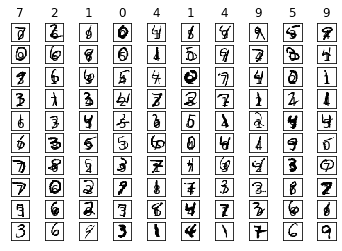

In [25]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = '/content/drive/My Drive/Colab Notebooks/MatrixComputation/mnist_test.csv'
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

# 
# plot first 100 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(100):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 10, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

In [26]:
print(f'num_image: {num_image}')
print(f'list_image.shape: {list_image.shape}')
print(f'list_label.shape: {list_label.shape}')

num_image: 10000
list_image.shape: (784, 10000)
list_label.shape: (10000,)


In [0]:
avg_images = []
repr_images = []
num_label = 10
size_img = size_row * size_col # resolution
# repr_img = np.zeros((size_row, size_col), dtype=float)

for i in range(num_label):
  avg_images.append(list())
  repr_images.append(np.zeros((size_row * size_col), dtype=float))

# colect images according to their labels
for j in range(num_label):
  for i in range(num_image):
    if list_label[i] == j:
        avg_images[j].append(list_image[:, i])

for i in range(num_label):
  avg_images[i] = np.array(avg_images[i])

# calculate ans assign the average values
for i in range(num_label):
  for j in range(size_img):
    repr_images[i][j] = np.mean(avg_images[i][j, :])

# for i in range(10):
#   print(repr_images[i].shape)

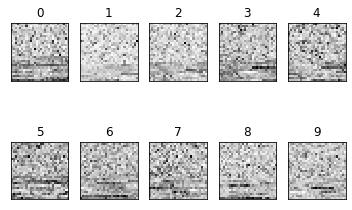

In [29]:
for i in range(num_label):

    label       = i
    im_vector   = repr_images[i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

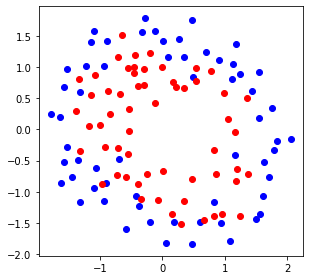

In [0]:
def normalize_data(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X-mean) / std

pointX = normalize_data(pointX)
pointY = normalize_data(pointY)

# float64 -> float128
pointX.astype(np.float128)
pointY.astype(np.float128)

# normalized data representation
pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [0]:
SIZE_DATA = len(pointX)
print(f'SIZE_DATA {SIZE_DATA}')
print(f'x.shape {pointX.shape}')
print(f'y.shape {pointY.shape}')
print(f'label.shape {label.shape}')

SIZE_DATA 118
x.shape (118,)
y.shape (118,)
label.shape (118,)


In [0]:
def pred_sigma(z):
  temp = 1 + np.exp(-z)
  np.nan_to_num(temp, copy=False) # makes nan to min, inf to max
  return 1./temp

In [0]:
def pred_z(theta, x, y):
  total = 0
  for i in range(10):
    for j in range(10):
      total = total + theta[i][j]*(np.power(x, i))*(np.power(y, j))
  # print(f'total {total}')
  return total

In [0]:
def objFunc(sigma, label, num, theta, l): # = J(theta)
  term1 = -label*np.log(sigma)
  term2 = (1-label)*np.log(1-sigma)
  np.nan_to_num(term1, copy=False)
  np.nan_to_num(term2, copy=False)
  term3 = (np.sum(theta**2, dtype=np.float128)*l)/2
  # print(f'term1 {term1}')
  # print(f'term2 {term2}')
  # print(f'term3 {term3}')
  result = np.mean((term1-term2), dtype=np.float128)
  # print(f'sum1 {result}')
  result = result + term3
  # print(f'result {result}')
  return result

In [0]:
def accuracy(pred_label, label):
  count = 0
  num = len(pred_label)
  for i in range(num):
    if pred_label[i]==label[i]:
      count = count+1
  return count/num

In [0]:
def sigma2label(sigma):
  pred_label = np.empty_like(sigma)
  for i in range(len(sigma)):
    if sigma[i] > 0.5:
      pred_label[i] = 1
    else:
      pred_label[i] = 0
  return pred_label

In [0]:
# Logistic regression #

In [0]:
def gradDescent(l, pointX, pointY, SIZE_DATA, label):
  # hyper parameters #
  SIZE_THETA = (10, 10)
  theta = np.ones(SIZE_THETA, dtype=np.float128) # initiate every theta as zero
  grad = np.ones(SIZE_THETA, dtype=np.float128)
  itr = 100 # step_size
  lr = 1e-2 # learning_rate

  cost_list = []
  theta_list = []
  accuracy_list = []

  for r in range(itr):
    z = pred_z(theta, pointX, pointY)
    sigma = pred_sigma(z)
    cost_prev = objFunc(sigma, label, SIZE_DATA, theta, l)
    # print(cost_prev)

    # check accuracy
    pred_label = sigma2label(sigma)
    accr = accuracy(pred_label, label)
    accuracy_list.append(accr)

    cost_list.append(cost_prev)
    theta_list.append(theta)

    for i in range(10):
      for j in range(10):
        temp = np.power(pointX, i)@np.power(pointY, j)
        if i == 0 and j == 0:    
          grad[i][j] = np.mean(sigma - label, dtype=np.float128)*temp
        else:
          grad[i][j] = np.mean(sigma - label, dtype=np.float128)*temp+(l*theta[i][j])/SIZE_DATA
    
    # print(grad)
    temp = theta - lr*grad

    z = pred_z(temp, pointX, pointY)
    sigma = pred_sigma(z)
    cost_next = objFunc(sigma, label, SIZE_DATA, theta, l)
    # print(cost_next)

    if(cost_prev < cost_next): # repeat until convergence cost_prev < cost_next
      break
    else:
      theta = temp

  print(f'lambda {l}')
  final_step = r
  final_theta = theta_list[-1]
  final_accr = accuracy_list[-1]
  print(f'final_step {final_step}')
  print(f'final_cost {cost_prev}')
  # print(f'cost {cost_list}')
  # print(f'theta {final_theta}')
  print(f'final_accuracy {final_accr}')
  # print(f'accuracy {accuracy_list}')
  # print(sigma)
  # print(pred_label)

  return l, final_step, final_theta, cost_list, accuracy_list, final_accr, pred_label

In [0]:
# demonstration for over-fitting
result_1 = gradDescent(0, pointX, pointY, SIZE_DATA, label)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


lambda 0
final_step 99
final_cost 2.7422437650442104e+307
final_accuracy 0.5677966101694916


In [0]:
# demonstration for just-right
result_2 = gradDescent(150, pointX, pointY, SIZE_DATA, label)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


lambda 150
final_step 76
final_cost 1.980509385865263e+307
final_accuracy 0.6186440677966102


In [0]:
# demonstration for under-fitting
result_3 = gradDescent(3000, pointX, pointY, SIZE_DATA, label)

lambda 3000
final_step 7
final_cost 6.093875033431578e+306
final_accuracy 0.6101694915254238


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


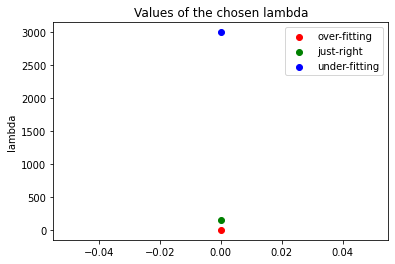

In [0]:
plt.scatter(0, result_1[0], c='r')
plt.scatter(0, result_2[0], c='g')
plt.scatter(0, result_3[0], c='b')
plt.ylabel('lambda')
plt.title('Values of the chosen lambda')
plt.legend(['over-fitting', 'just-right', 'under-fitting'])
plt.show()

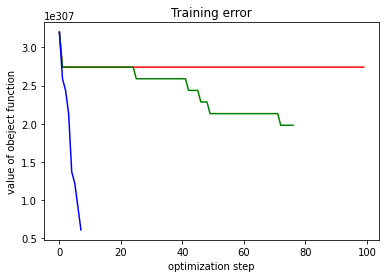

In [0]:
plt.plot(range(result_1[1]+1), result_1[3], c='r')
plt.plot(range(result_2[1]+1), result_2[3], c='g')
plt.plot(range(result_3[1]+1), result_3[3], c='b')
plt.xlabel('optimization step')
plt.ylabel('value of obeject function')
plt.title('Training error')
plt.show()

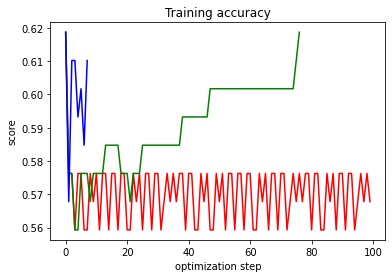

In [0]:
plt.plot(range(result_1[1]+1), result_1[4], c='r')
plt.plot(range(result_2[1]+1), result_2[4], c='g')
plt.plot(range(result_3[1]+1), result_3[4], c='b')
plt.xlabel('optimization step')
plt.ylabel('score')
plt.title('Training accuracy')
plt.show()

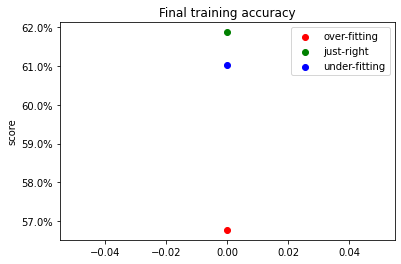

In [0]:
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots()
ax.scatter(0, result_1[5], c='r')
ax.scatter(0, result_2[5], c='g')
ax.scatter(0, result_3[5], c='b')
ax.set_ylabel('score')
ax.set_title('Final training accuracy')
ax.legend(['over-fitting', 'just-right', 'under-fitting'])
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [0]:
x_test = np.arange(-2.0, 2.0, 0.1)
y_test = np.arange(-2.0, 2.0, 0.1)
x_test = normalize_data(x_test)
y_test = normalize_data(y_test)

X, Y = np.meshgrid(x_test, y_test)

In [0]:
test_z_1 = pred_z(result_1[2], X, Y)
bound_z_1 = np.empty_like(test_z_1)
for i in range(len(X)):
  for j in range(len(Y)):
    bound_z_1[i][j] = int(test_z_1[i][j])

test_z_2 = pred_z(result_2[2], X, Y)
bound_z_2 = np.empty_like(test_z_2)
for i in range(len(X)):
  for j in range(len(Y)):
    bound_z_2[i][j] = int(test_z_2[i][j])

test_z_3 = pred_z(result_3[2], X, Y)
bound_z_3 = np.empty_like(test_z_3)
for i in range(len(X)):
  for j in range(len(Y)):
    bound_z_3[i][j] = int(test_z_3[i][j])

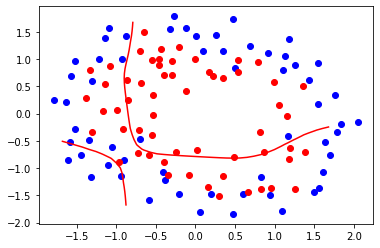

In [0]:
pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

fig, ax = plt.subplots()
CS = ax.contour(X, Y, test_z_1, levels=[0.],  colors='r')
ax.scatter(pointX0, pointY0, c='b')
ax.scatter(pointX1, pointY1, c='r')

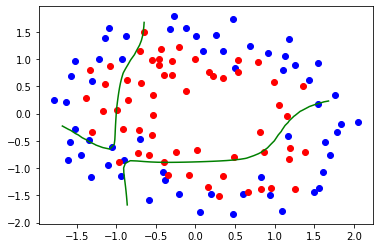

In [0]:
pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

fig, ax = plt.subplots()
CS = ax.contour(X, Y, test_z_2, levels=[0.], colors='g')
ax.scatter(pointX0, pointY0, c='b')
ax.scatter(pointX1, pointY1, c='r')

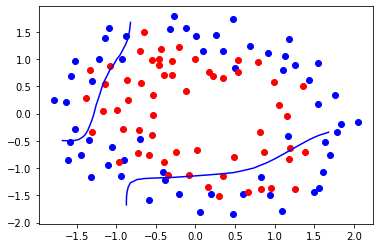

In [0]:
pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

fig, ax = plt.subplots()
CS = ax.contour(X, Y, test_z_3, levels=[0.], colors='b')
ax.scatter(pointX0, pointY0, c='b')
ax.scatter(pointX1, pointY1, c='r')